In [501]:
# note on high redshift standardizable candles

In [502]:
%matplotlib notebook

In [503]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [504]:
#from MyUnit import NaturalUnit
import os
import numpy as np
import sys,os
import pickle
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from scipy.special import gamma 
from scipy.integrate import quad

import igm as ig
import data as dt
import chi2 as ch
import cosmo as co
import tools as tl

from ag_probs import omega_plasma

In [505]:
# OPTIONAL: import the a2a3 branch for analyzing the a2-a3 fit
# used to compare with the axion fit. 
# This requires the a2a3 branch stored in a separate 
# folder named quasars_a2a3, at the same level as the 
# one that contains the master branch

path = '/home/chen/Code/'
sys.path.insert(0, path)
from quasars_a2a3 import igm as ig_a23
from quasars_a2a3 import data as dt_a23
from quasars_a2a3 import chi2 as ch_a23
from quasars_a2a3 import cosmo as co_a23

# OPTIONAL: import the sharp edge beta(z) best fit
# used to compare with the axion fit. 
# This requires the betaz branch stored in a separate 
# folder named quasars_betaz_sharp, 
# at the same level as the one that 
# contains the master branch

# from quasars_betaz_sharp import igm as ig_bsharp
# from quasars_betaz_sharp import data as dt_bsharp
# from quasars_betaz_sharp import chi2 as ch_bsharp
# from quasars_betaz_sharp import cosmo as co_bsharp

In [506]:
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [ ]:
# [f.name for f in matplotlib.font_manager.fontManager.ttflist]

# Load the data

In [508]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=0.,
                       Gamma_up=100.)
                       
(qso_name_raw_arr,
 qso_z_raw_arr,
 qso_f2500_raw_arr,
 qso_df2500_raw_arr,
 qso_f2keV_raw_arr,
 qso_df2keV_low_raw_arr,
 qso_df2keV_up_raw_arr,
 qso_Gamma_raw_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [509]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=1.2,
                       Gamma_up=100)
(qso_name_arr,
 qso_z_arr,
 qso_f2500_arr,
 qso_df2500_arr,
 qso_f2keV_arr,
 qso_df2keV_low_arr,
 qso_df2keV_up_arr,
 qso_Gamma_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [510]:
pan_data = dt.load_pantheon('./likelihoods',
                   'lcparam_full_long.dat',
                   'sys_full_long.dat',
                   1048,
                   True)

In [511]:
ch.use_loglkl = True
ch_a23.use_loglkl = True

In [512]:
# constructe the kwargs
# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

pan_kwargs = {'B': 1,
              'mg': omega_plasma(1.6e-8),
              's': 1,
              'omega': 1, # [eV]
              'axion_ini_frac': 0.,
              'smoothed': False,
              'redshift_dependent': True,
              'method': 'simps',
              'prob_func': 'norm_log',
              'Nz': 101,
              'skip_LumMod': False}

# Check the fit variable directly

-139.15397455916542


<IPython.core.display.Javascript object>


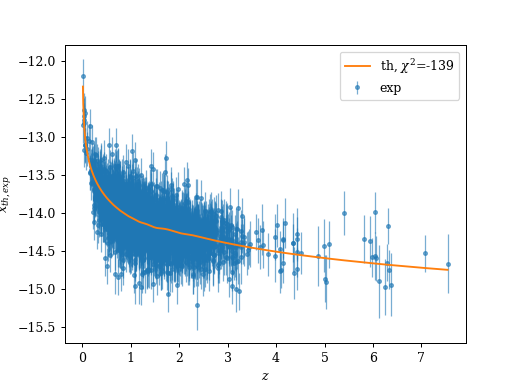

In [513]:
OmL, h0, logma, logga, qso_gamma, qso_beta, qso_delta = \
tuple([0.68211518,   0.67408777, -13.06924146, -10.09478038, 0.62760049,   7.60214181,   0.22578225])

# (ma, ga, OmL, h0, w0, wa, qso_gamma, qso_beta0, qso_beta1, qso_delz, qso_z0, qso_delta)
x = (10**logma, 10**logga, OmL, h0, -0.999999, 0., qso_gamma, qso_beta, 0., 1., 100, qso_delta)




(chi2, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2)

plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.6)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='th, $\chi^2$=%.0f' %chi2)


plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

In [514]:
help(ch_a23.chi2_quasars)

Help on function chi2_quasars in module quasars_a2a3.chi2:

chi2_quasars(x, data=None, vectorize=True, full_output=False, dm_output=False, **kwargs)
    Computes quasars chi2.     **kwargs contain the arguments for LumMod.
    
    :param x: the theory point that contains (ma, ga, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)
    :param data: must be have certain structures. See source code for the structure needed.
    :param vectorize: whether to vectorize the computation
    :param full_output: whether to output other quantities besides chi2, useful for testing.
    :param dm_output: whether to output the distance modulus and its error bar



-142.9001534443872


<IPython.core.display.Javascript object>


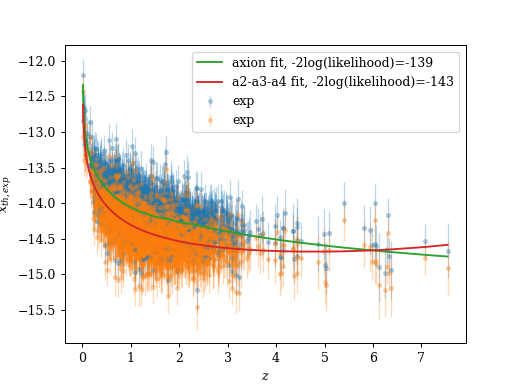

In [515]:
# our best fit (large a4 range)
a2, a3, a4, h0, M0, qso_gamma, qso_beta, qso_delta = \
tuple([  3.03628631,   5.1205381 ,  -8.22939399,   0.70916448,
       -19.33086951,   0.61896352,   7.67155186,   0.22593313])
x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)


ch_a23.use_loglkl = True

(chi2_1, 
 mu_th_1_arr, 
 mu_exp_1_arr, 
 sigma_1_arr,
 qso_z_1_arr) = ch_a23.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_1)

plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
plt.errorbar(qso_z_1_arr, mu_exp_1_arr, sigma_1_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='axion fit, -2log(likelihood)=%.0f' %chi2)

x, y = zip(*sorted(zip(qso_z_1_arr, mu_th_1_arr)))
plt.plot(x, y, '-', zorder=10, label='a2-a3-a4 fit, -2log(likelihood)=%.0f' %chi2_1)



#plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

# Distance Modulus

<IPython.core.display.Javascript object>


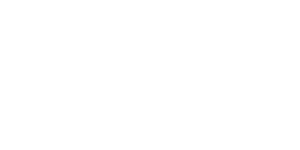

No handles with labels found to put in legend.


In [516]:
dm_fig, dm_ax = plt.subplots()
plt.ylabel('$\mu_{th, exp}$')
plt.xlabel('$z$')
plt.legend()
plt.close()

<IPython.core.display.Javascript object>


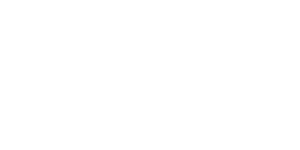

<IPython.core.display.Javascript object>


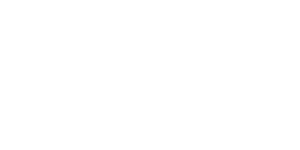

<IPython.core.display.Javascript object>


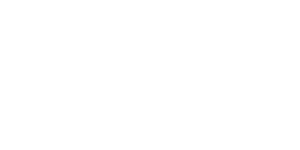

<IPython.core.display.Javascript object>


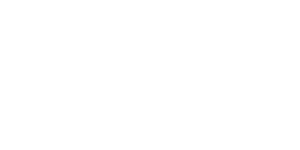

<IPython.core.display.Javascript object>


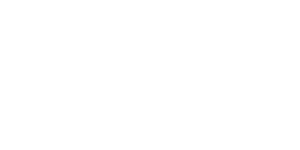

In [517]:
residual_fig, residual_ax = plt.subplots()
plt.title(r'The residual using QSO data w/ best fit $\beta, \gamma$')
plt.ylabel('$\sigma$')
plt.xlabel('$z$')
plt.close()


residual_pan_fig, residual_pan_ax = plt.subplots()
plt.title(r'The (unnormalized) residual using PAN data$')
plt.ylabel('$\mu^{th}-\mu^{exp}$')
plt.xlabel('$z$')
plt.close()

residual_unnorm_fig, residual_unnorm_ax = plt.subplots()
plt.title(r'The (unnormalized) residual using QSO data w/ best fit $\beta, \gamma$')
plt.ylabel('$\mu^{th}-\mu^{exp}$')
plt.xlabel('$z$')
plt.close()

residual_LCDM_fig, residual_LCDM_ax = plt.subplots()
plt.title(r'The residual compared with $\mu_{\rm LCDM}$ from Planck 2018')
plt.ylabel('$\mu^{th}-\mu^{exp}$')
plt.xlabel('$z$')
plt.close()

feature_fig, feature_ax = plt.subplots()
#plt.title('The non-$\Lambda CDM$ feature')
# plt.title('The modification of the UV-X-ray relation')
plt.ylabel(r'$\beta_{\rm eff}(z)-\beta_{\rm eff}(z=8)$', fontsize=13)
plt.xlabel(r"z", fontsize=13)
plt.close()

In [518]:
def binning(y, dyraw, delta=0):
    dy = np.sqrt(dyraw**2 + delta**2)
    dybar = 1/np.sqrt(np.sum(1/dy**2))
    ybar = np.sum(y/dy**2) * dybar**2
    return ybar, dybar

bins_lowz = np.arange(0.01, 2, 0.1) 
bins_midz = np.arange(2., 6., 0.5)
bins_highz = np.arange(6, 10, 1.)
bins = np.concatenate((bins_lowz, bins_midz, bins_highz))


In [519]:
bins_lowz = np.arange(0.01, 0.2, 0.02) 
bins_midz = np.arange(0.2, 1, 0.04) 
bins_highz = np.arange(1., 3., 0.3)
bins_pan = np.concatenate((bins_lowz, bins_midz, bins_highz))


# $\Lambda$CDM

In [520]:
h0_plk = 0.6736
OmL_plk= 0.6847
w0_plk = -1.
wa_plk = 0.

z_arr = np.logspace(-2, np.log10(8), 1000)
dm_lcdm_arr = np.array([co.distance_modulus(z=z, 
                                            h0=h0_plk, 
                                            OmL=OmL_plk, 
                                            w0=w0_plk, 
                                            wa=wa_plk) for z in z_arr])
dm_ax.plot(z_arr, dm_lcdm_arr,
           'k-', zorder=1, label='LCDM, Planck 2018')

In [521]:
# prepare the lcdm dm to be compared with each best fit
tau_at_z_vec = np.vectorize(co.tau_at_z)
DL_arr = tau_at_z_vec(qso_z_arr, h0_plk, OmL_plk, w0=w0_plk, wa=wa_plk) * \
    (1.+qso_z_arr) * ch._Mpc_over_cm_  # [cm]

dm_lcdm_arr = 5. * np.log10(DL_arr/(ch._Mpc_over_cm_/ch._Mpc_over_10pc_))

# $\beta(z)$ sharp

Use the following to first find the best fit point.

In [522]:
# (bf_chi2,
#  x_mesh,
#  y_mesh,
#  chi2_mins,
#  idx_mins_global,
#  x_arr, y_arr,
#  delta_arr,
#  _,
#  pts, 
#  blobs) = parse(directory="../quasars_betaz/chains/run049_betaz_two_betas",   
#                     chain_name="chain_1.h5",
#                     x_name="OmL",
#                     y_name="h0",
#                     bins=10)


# pts[363288]
# array([0.68020187, 0.67346292, 0.61895969, 7.69938118, 7.81716552,
#        1.64706455, 0.2258213 ])
# variables scanned: ['OmL', 'h0', 'qso_gamma', 'qso_beta0', 'qso_beta1', 'qso_z0', 'qso_delta']


In [523]:
# ch_bsharp.use_loglkl=True

In [524]:
## prod003 Q+G
OmL, h0, M0, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delta = \
tuple([1.41549243e-02,  6.73250694e-01, -2.07838073e+01,  5.96012841e-01,
        8.29107948e+00,  8.39213468e+00,  1.65467202e+00,  2.24064717e-01])
qso_delz = 0.01

# ## prod007 Q+G+B
# OmL, h0, M0, rs, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delta = \
# tuple([0.6725407 ,   0.67513909, -19.41504894, 147.1228177 ,
#          0.6141705 ,   7.82670222,   7.94517835,   1.64804673,
#          0.22473617])
# qso_delz = 0.01

x = (10**-15, 10**-18, OmL, h0, -1, 0., qso_gamma, qso_beta0, qso_beta1, qso_delz, qso_z0, qso_delta)


(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.3
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



quasars -2log(likelihood): -169.17526981607193


<IPython.core.display.Javascript object>


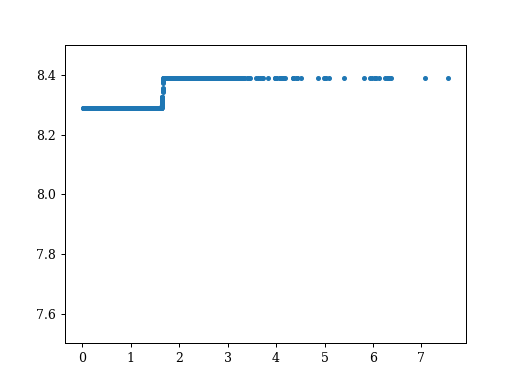

(7.5, 8.5)

In [525]:
plt.subplots()
plt.plot(qso_z_arr, qso_beta, '.')
plt.ylim(7.5, 8.5)

In [526]:
z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# dm binned
dm_ax.errorbar(z_bin_arr+0.01, dm_bin_arr, ddm_bin_arr, 
               fmt='.', 
               label='exp binned: sharp beta(z), $z$ shifted by 0.01',
               linewidth=1,
               zorder=10)

# distance measure plot
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label=r'$\beta(z)$ bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='-', 
                     #ecolor='r', 
                     label='beta(z) best fit', linewidth=1, zorder=11)



# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='-',
                     # fmt='C2-', 
                     # ecolor='C2', 
                     label='beta(z) best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')



# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr+0.06, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     fmt='.',
                     label='LCDM-beta(z) data, $\Delta z=0.06$', 
                     linewidth=1, zorder=11)



<ipython-input-518-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-518-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [527]:
# feature figure
z_arr = np.linspace(0, 8, 1000)
feature_arr = np.zeros_like(z_arr)
feature_arr[z_arr<qso_z0] = qso_beta0
feature_arr[z_arr>=qso_z0] = qso_beta1
feature_ax.plot(z_arr, feature_arr-feature_arr[-1], linestyle=(0, (3,1,1,1,1,1)), 
                label=r"$\beta_\sharp$", linewidth=2.5)

# $\beta(z)$ smooth

In [528]:
# ch_bsharp.use_loglkl=True

## prod004 Q+G
OmL, h0, M0, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delz, qso_delta = \
tuple([ 0.66124769,   0.6748955 , -19.68827557,   0.5758344 ,
         8.79347462,   9.30589919,   1.58066334,   2.25509263,
         0.22479936])

# ## prod008 Q+B+G
# OmL, h0, M0, rs, qso_gamma, qso_beta0, qso_beta1, qso_z0, qso_delz, qso_delta = \
# tuple([ 0.67707599,   0.67732895, -19.40848445, 147.03467144,
#          0.57779895,   8.70655871,   9.25799241,   1.47460797,
#          2.4098322 ,   0.22460532 ])


# x = (10**logma, 10**logga, OmL, h0, -1, 0., qso_gamma, qso_beta0, qso_beta1, qso_delz, qso_z0, qso_delta)
x = (10**-15, 10**-18, OmL, h0, -1, 0., qso_gamma, qso_beta0, qso_beta1, qso_delz, qso_z0, qso_delta)



(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.35
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



quasars -2log(likelihood): -179.11852731137492


<IPython.core.display.Javascript object>


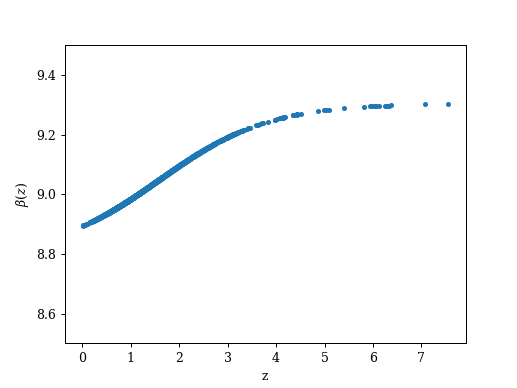

Text(0, 0.5, '$\\beta(z)$')

In [529]:
plt.subplots()
plt.plot(qso_z_arr, tl.smooth_step(qso_z_arr, qso_beta0, qso_beta1, qso_delz, qso_z0), '.')
plt.ylim(8.5, 9.5)
plt.xlabel('z')
plt.ylabel(r"$\beta(z)$")

In [530]:
z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# dm binned
dm_ax.errorbar(z_bin_arr+0.01, dm_bin_arr, ddm_bin_arr, 
               fmt='.', 
               #ecolor='', 
               label='exp binned: smooth beta(z), $z$ shifted by 0.01',
               linewidth=1,
               zorder=10)

# distance measure plot
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label=r'$\beta(z)$ smooth bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
# residual3_ax.errorbar(z_bin_arr, 
#                      (y_bin-dm_bin_arr)/ddm_bin_arr, 
#                      [0]*len(y_bin), 
#                      fmt='r-', 
#                      ecolor='r', 
#                      label='beta(z) best fit', linewidth=1, zorder=11)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='-', 
                     #ecolor='r', 
                     label='beta(z) smooth best fit', linewidth=1, zorder=11)



# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     #fmt='C2-', 
                     #ecolor='C2', 
                     label='beta(z) smooth best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')



# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr+0.03, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     #[0]*len(y_bin), 
                     fmt='.',
                     #fmt='C2-', 
                     #ecolor='C2', 
                     label='LCDM-beta(z) smooth data, $\Delta z=0.03$', 
                     linewidth=1, zorder=11)



<ipython-input-518-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-518-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [531]:
# feature figure
z_arr = np.linspace(0, 8, 1000)
feature_arr = np.zeros_like(z_arr)
feature_arr = tl.smooth_step(z_arr, qso_beta0, qso_beta1, qso_delz, qso_z0)
feature_ax.plot(z_arr, feature_arr-feature_arr[-1], '--', 
                label=r"$\beta_t$", linewidth=2.5)

# a2a3a4 fit

In [532]:
# # prod013 Q+G
a2, a3, a4, h0, qso_gamma, qso_beta, qso_delta = \
(4.32886457, -5.80102239,  2.7359224 ,  0.67358767,  0.57839824, 8.85247614,  0.22409097)
x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)

# # prod010 Q+B+G
# a2, a3, a4, h0, M0, rs, qso_gamma, qso_beta, qso_delta = \
# ( 2.85178566,   5.75892776,  -8.74638943,   0.67758173,
#        -19.41521511, 147.14432511,   0.62149548,   7.60839724,
#          0.22597766)
# x = (_, _, h0, a2, a3, a4, qso_gamma, qso_beta, qso_delta)




(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr) = ch_a23.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.28
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# check pantheon chi2:
# (ma, ga, h0, a2, a3, a4, M0) for a2a3a4 expansion
x = (_, _, h0, a2, a3, a4, M0)
print("Pantheon -2log(likelihood):", ch_a23.chi2_Pantheon(x,
                                                      data=pan_data,
                                                        vectorize=True,
                                                       **pan_kwargs))


# compute the distance modulus chi2
chi2_bf = np.sum((dm_th_arr-dm_exp_arr)**2/ddm_arr**2)
chi2_lcdm = np.sum((dm_lcdm_arr-dm_exp_arr)**2/ddm_arr**2)
print('best fit chi2 w/ distance modulus:', chi2_bf)
print('lcdm chi2 w/ distance modulus:', chi2_lcdm)
chi2_bf-chi2_lcdm

quasars -2log(likelihood): -179.3909011680151
Pantheon -2log(likelihood): 2663.5593943654403
best fit chi2 w/ distance modulus: 760.1362938686275
lcdm chi2 w/ distance modulus: 996.9099301580463


-236.77363628941885

In [533]:
# TODO: bin it, digitize qso_z_arr

z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, fmt='.', label='exp binned, a2a3a4', linewidth=1, zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='a2-a3-a4, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)
residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='-',
                     label='a2-a3-a4 best fit', 
                     linewidth=1, zorder=11)
residual_ax.fill_between(np.linspace(min(z_bin_arr), max(z_bin_arr)), 1, -1, alpha=0.2, color='k')


# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='-',
                     label='a2-a3-a4 best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')


# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr-0.03, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     fmt='.', 
                     label='LCDM-a2a3a4 data, $\Delta z = -0.03$', 
                     linewidth=1, zorder=11)




<ipython-input-518-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-518-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [534]:
z_arr = np.linspace(0, 8, 1000)
gamma_bf = qso_gamma
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_arr])
mu_bf_arr = np.array([co_a23.muLCDM(z, h0, a2, a3, a4) for z in z_arr])

feature_arr = (mu_bf_arr-mu_lcdm_arr)/5.*2.*(gamma_bf-1.)
feature_ax.plot(z_arr, feature_arr-feature_arr[-1], '-.', 
                label=r'$a_2a_3a_4$', linewidth=2.5)


/home/chen/Code/quasars_master/cosmo.py:155: RuntimeWarning: divide by zero encountered in log10
  return 5. * log10(dL_at_z(z, h0, OmL, w0, wa)) + 25
/home/chen/Code/quasars_a2a3/cosmo.py:203: RuntimeWarning: divide by zero encountered in log10
  res = 5.*np.log10(dL_at_z(z, h0, a2, a3, a4)*1.e5)
<ipython-input-534-995666fcacbe>:6: RuntimeWarning: invalid value encountered in subtract
  feature_arr = (mu_bf_arr-mu_lcdm_arr)/5.*2.*(gamma_bf-1.)


<IPython.core.display.Javascript object>


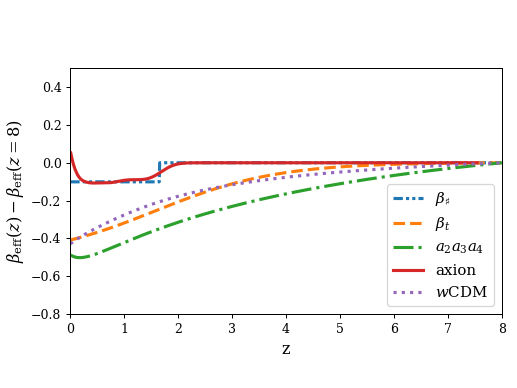

In [535]:
feature_ax.legend()
feature_fig

# axion fit

In [537]:
# prod005 Q+G
OmL, h0, logma, logga, M0, qso_gamma, qso_beta, qso_delta \
= np.array([1.58237363e-02,  6.74787689e-01, -1.33304876e+01, -1.05818402e+01, -1.85100463e+01,  6.02340460e-01,  8.26406905e+00,  2.24982821e-01])

# # prod011 Q+B+G
# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta, qso_delta \
# = np.array([ 0.66940357,   0.67586153, -13.0688173 , -10.12136476,
#        -19.41236474, 147.08500235,   0.62708055,   7.60300436,
#          0.22580173])


# adapt to smoothed beta(z)
#     (ma, ga, OmL, h0, w0, wa, qso_gamma, qso_beta0,
#      qso_beta1, qso_delz, qso_z0, qso_delta) = x
x = (10**logma, 10**logga, OmL, h0, -1, 0., qso_gamma, qso_beta, 0., 1., 100., qso_delta)


(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr,
 logPggOptical_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              get_optical=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.4
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)



# compute the distance modulus chi2
chi2_bf = np.sum((dm_th_arr-dm_exp_arr)**2/ddm_arr**2)
chi2_lcdm = np.sum((dm_lcdm_arr-dm_exp_arr)**2/ddm_arr**2)
print('best fit chi2 w/ distance modulus:', chi2_bf)
print('lcdm chi2 w/ distance modulus:', chi2_lcdm)
chi2_bf-chi2_lcdm

quasars -2log(likelihood): -169.65421490058486
best fit chi2 w/ distance modulus: 512.9847812189183
lcdm chi2 w/ distance modulus: 609.0499655677174


-96.06518434879911

In [538]:
z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# unbinned
# dm_ax.errorbar(qso_z_arr, dm_exp_arr, ddm_arr, fmt='.', label='exp', linewidth=1, alpha=0.3)
# binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, 
               fmt='.',
               # fmt='r.', 
               # ecolor='r', 
               label='exp binned axion',
               linewidth=1,
               zorder=10)

# plot out distance measure
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label='axion bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='-', 
                     #ecolor='r', 
                     label='axion best fit', linewidth=1, zorder=11)



# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='-',
                     label='axion best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')



# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     fmt='.',
                     label='LCDM-axion data', 
                     linewidth=1, zorder=11)


<ipython-input-518-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-518-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [539]:
# axion best fit attenuation

<IPython.core.display.Javascript object>


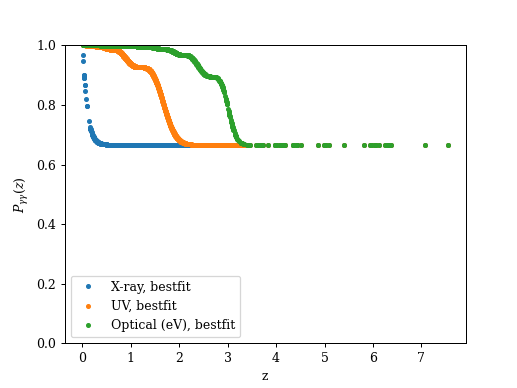

Text(0, 0.5, '$P_{\\gamma\\gamma}(z)$')

In [540]:
plt.subplots()
plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, bestfit')
plt.plot(qso_z_arr, 10**logPggUV_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 10**logPggOptical_arr, '.', label='Optical (eV), bestfit')
plt.ylim(0,1)
plt.legend()
plt.xlabel('z')
plt.ylabel(r"$P_{\gamma\gamma}(z)$")

In [541]:
gamma_bf = 0.62760049
feature_arr = logPggX_arr-gamma_bf*logPggUV_arr
idx = qso_z_arr.argsort()
feature_ax.plot(qso_z_arr[idx], feature_arr[idx]-feature_arr[idx][-1], 
                '-', label='axion', linewidth=2.5) 


In [542]:
# crank up the mass and coupling
# x = (10**logma*4, 10**logga*16, OmL, h0, -1, 0., qso_gamma, qso_beta, 0., 100., qso_delta)
x = (10**logma*4, 10**logga*16, OmL, h0, -1, 0., qso_gamma, qso_beta, 0., 1., 100., qso_delta)

(chi2, 
 _, 
 _, 
 _,
 _, 
 _,
 _, 
 _,
 _, 
 _, 
 _,
 _,
 logPggX_uptown_arr, 
 logPggUV_uptown_arr,
 logPggOptical_uptown_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              get_optical=True,
                              **quasars_kwargs)

<IPython.core.display.Javascript object>


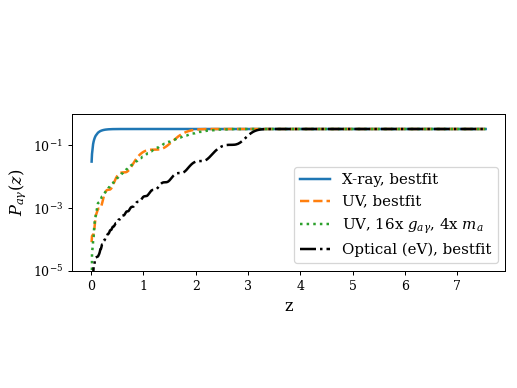

In [543]:
_, ax = plt.subplots()

idx = qso_z_arr.argsort()

plt.plot(qso_z_arr[idx], 1-10**logPggX_arr[idx], '-', label='X-ray, bestfit', linewidth=2.)
plt.plot(qso_z_arr[idx], 1-10**logPggUV_arr[idx], '--', label='UV, bestfit', linewidth=2.)
plt.plot(qso_z_arr[idx], 1-10**logPggUV_uptown_arr[idx], ':', label='UV, 16x $g_{a\gamma}$, 4x $m_a$', linewidth=2.)
plt.plot(qso_z_arr[idx], 1-10**logPggOptical_arr[idx], 'k-.', label='Optical (eV), bestfit', linewidth=2.)
plt.legend(prop={'size': 12})
plt.xlabel('z', fontsize=13)
plt.ylabel(r"$P_{a\gamma}(z)$", fontsize=13)
plt.yscale('log')
plt.ylim(1e-5, 1.)
ax.set_aspect(0.6)
# plt.xscale('log')
plt.tight_layout()
plt.savefig('plots/fig2_photon_survival.pdf')

<IPython.core.display.Javascript object>


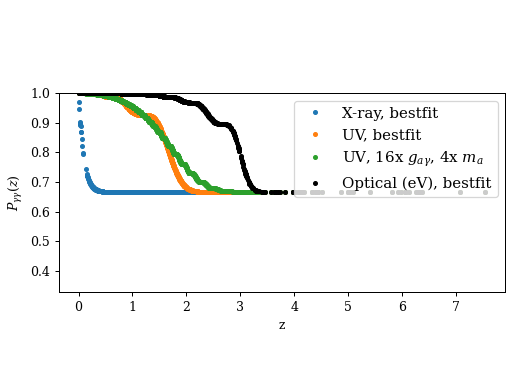

In [544]:
_, ax = plt.subplots()
plt.plot(qso_z_arr, 10**logPggX_arr, '.', label='X-ray, bestfit')
plt.plot(qso_z_arr, 10**logPggUV_arr, '.', label='UV, bestfit')
plt.plot(qso_z_arr, 10**logPggUV_uptown_arr, '.', label='UV, 16x $g_{a\gamma}$, 4x $m_a$')
plt.plot(qso_z_arr, 10**logPggOptical_arr, 'k.', label='Optical (eV), bestfit')
plt.ylim(0.33,1)
plt.legend(prop={'size': 12})
plt.xlabel('z')
plt.ylabel(r"$P_{\gamma\gamma}(z)$")
ax.set_aspect(5.5)
plt.tight_layout()
# plt.savefig('plots/photon_survival-old.pdf')

# $w_0-w_a$ fit

In [545]:
# prod012 Q+G
OmL, h0, w0, wa, qso_gamma, qso_beta0, qso_delta = \
tuple([0.10590046, 0.6723646 , 0.99076117, 0.9940571 , 0.58284599,
       8.63612733, 0.22324519])


# # prod009 Q+B+G
# OmL, h0, w0, wa, M0, rs, qso_gamma, qso_beta0, qso_delta = \
# tuple([  0.98864345,   0.67615089,  -0.847728  ,   0.99925341,
#        -19.42945573, 147.18363767,   0.65264336,   6.68330785,
#          0.22834472])

# x = (10**-15, 10**-16, OmL, h0, w0, wa, qso_gamma, qso_beta0, 5., 50., qso_delta)
# adapt to smooth beta(z)
x = (10**-15, 10**-16, OmL, h0, w0, wa, qso_gamma, qso_beta0, 5.,1., 50., qso_delta)



(chi2, 
 dm_th_arr, 
 dm_exp_arr, 
 qso_z_arr,
 qso_gamma, 
 qso_beta,
 qso_delta, 
 qso_logf2500_arr,
 qso_logf2keV_arr, 
 qso_dlogf2500_arr, 
 qso_dlogf2keV_low_arr,
 qso_dlogf2keV_up_arr,
 logPggX_arr, 
 logPggUV_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              dm_output=True,
                              **quasars_kwargs)
print("quasars -2log(likelihood):", chi2)

# compute the error bar size for the distance modulus
# read out from the 1D posterior
qso_dbeta = 0.3
qso_dgamma = 0.01
ddm_arr = 5./2./(qso_gamma-1.) \
            * np.sqrt(qso_dlogf2500_arr**2 \
                      + qso_gamma**2*(qso_dlogf2keV_up_arr/2.+qso_dlogf2keV_low_arr/2.)**2\
                      + qso_dbeta**2 \
                      + qso_dgamma**2/(qso_gamma-1.)**2*(qso_logf2500_arr-qso_logf2keV_arr+qso_beta)**2)




# compute the distance modulus chi2
chi2_bf = np.sum((dm_th_arr-dm_exp_arr)**2/ddm_arr**2)
chi2_lcdm = np.sum((dm_lcdm_arr-dm_exp_arr)**2/ddm_arr**2)
print('best fit chi2 w/ distance modulus:', chi2_bf)
print('lcdm chi2 w/ distance modulus:', chi2_lcdm)
chi2_bf-chi2_lcdm

quasars -2log(likelihood): -171.06581673675532
best fit chi2 w/ distance modulus: 718.7475184366219
lcdm chi2 w/ distance modulus: 1247.5313308557966


-528.7838124191746

In [546]:
z_bin_arr = []
dm_bin_arr = []
ddm_bin_arr = []
digi = np.digitize(qso_z_arr, bins)

for i,_ in enumerate(bins):
    x_arr = qso_z_arr[digi==i]
    y_arr = dm_exp_arr[digi==i]
    dy_arr = ddm_arr[digi==i]
    
    ybar, dybar = binning(y_arr, dy_arr, qso_delta)
    zbar, _ = binning(x_arr, dy_arr, qso_delta)
    
    z_bin_arr.append(zbar)
    dm_bin_arr.append(ybar)
    ddm_bin_arr.append(dybar)

z_bin_arr = np.array(z_bin_arr)
dm_bin_arr = np.array(dm_bin_arr)
ddm_bin_arr = np.array(ddm_bin_arr)



# dm binned
dm_ax.errorbar(z_bin_arr, dm_bin_arr, ddm_bin_arr, 
               fmt='.',
               # fmt='C4.', 
               # ecolor='C4', 
               label='exp binned w0-wa',
               linewidth=1,
               zorder=10)

# distance measure plot
x, y = zip(*sorted(zip(qso_z_arr, dm_th_arr)))
dm_ax.plot(x, y, '-', zorder=10, label=r'$w_0-w_a$ bestfit, -2log(likelihood)=%.0f' %chi2)
dm_ax.legend()


# compute residual plot
_, yexp = zip(*sorted(zip(qso_z_arr, dm_exp_arr)))
_, dy = zip(*sorted(zip(qso_z_arr, ddm_arr)))
x, y, yexp, dy = np.array(x), np.array(y), np.array(yexp), np.array(dy)


# binned residual
#z_bin_arr, dm_bin_arr, ddm_bin_arr
y_bin = np.interp(z_bin_arr, x, y)

residual_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr)/ddm_bin_arr, 
                     [0]*len(y_bin), 
                     fmt='-', 
                     #ecolor='r', 
                     label=r'$w_0-w_a$ best fit', linewidth=1, zorder=11)


# residual plot without being normalized to sigma
residual_unnorm_ax.errorbar(z_bin_arr, 
                     (y_bin-dm_bin_arr), #th-exp
                     [0]*len(y_bin), 
                     fmt='C4-', 
                     ecolor='C4', 
                     label=r'$w_0-w_a$ best fit', 
                     linewidth=1, zorder=11)
residual_unnorm_ax.fill_between(z_bin_arr, -ddm_bin_arr, ddm_bin_arr, alpha=0.2, color='k')


# residual of LCDM 
mu_lcdm_arr = np.array([co.distance_modulus(z=z, h0=h0_plk, OmL=OmL_plk, w0=w0_plk, wa=wa_plk) for z in z_bin_arr])
residual_LCDM_ax.errorbar(z_bin_arr-0.06, 
                     (mu_lcdm_arr-dm_bin_arr), #lcdm-exp
                     ddm_bin_arr,
                     #[0]*len(y_bin), 
                     #fmt='C3-', 
                     #ecolor='C3', 
                     fmt='.',
                     label='LCDM-w0wa data, $\Delta z = -0.06$', 
                     linewidth=1, zorder=11)



<ipython-input-518-cf52c130d3ec>:3: RuntimeWarning: divide by zero encountered in double_scalars
  dybar = 1/np.sqrt(np.sum(1/dy**2))
<ipython-input-518-cf52c130d3ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  ybar = np.sum(y/dy**2) * dybar**2


<ErrorbarContainer object of 3 artists>

In [547]:
z_arr = np.linspace(0.001, 8, 1000)
mu_lcdm_arr = np.array([co.distance_modulus(z, h0_plk, OmL_plk, w0=-1., wa=0.) for z in z_arr])
mu_w0wa_arr = np.array([co.distance_modulus(z, h0, OmL, w0=w0, wa=wa) for z in z_arr])
gamma_bf = qso_gamma

feature_arr = (mu_w0wa_arr - mu_lcdm_arr)/5.*2.*(gamma_bf-1)
feature_ax.plot(z_arr, feature_arr-feature_arr[-1], ':', 
                label=r"$w$CDM", linewidth=2.5)

<IPython.core.display.Javascript object>


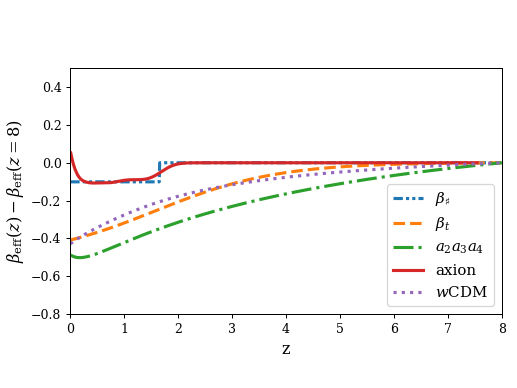

In [548]:
feature_fig

<IPython.core.display.Javascript object>


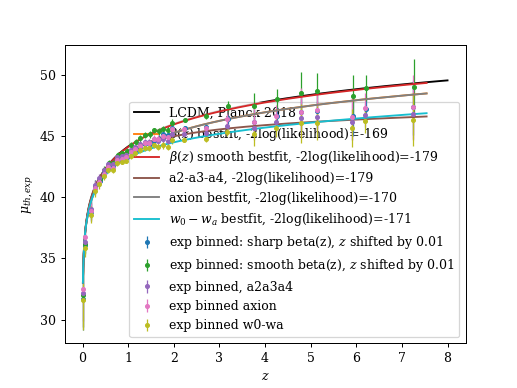

In [549]:
dm_ax.legend()
dm_fig

<IPython.core.display.Javascript object>


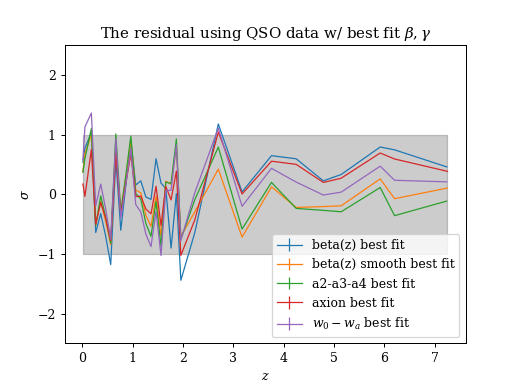

In [550]:
residual_ax.legend()
residual_ax.set_ylim(-2.5, 2.5)
residual_fig

<IPython.core.display.Javascript object>


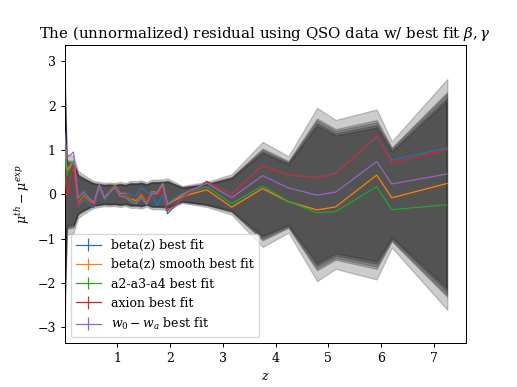

In [551]:
residual_unnorm_ax.legend()
residual_unnorm_ax.set_xlim(0.01, 7.6)
residual_unnorm_ax.set_xscale('linear')
# residual_unnorm_fig.savefig('./plots/residual.pdf')
residual_unnorm_fig

<IPython.core.display.Javascript object>


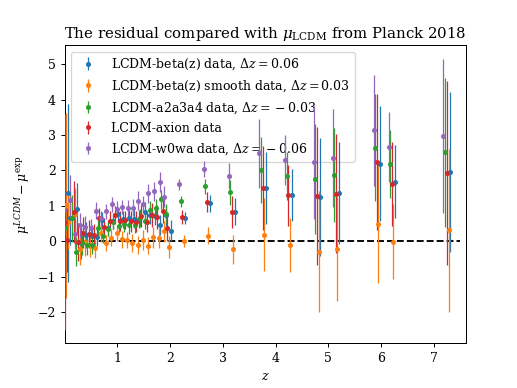

In [552]:
residual_LCDM_ax.legend(loc=2)
residual_LCDM_ax.set_xlim(0.01, 7.6)
residual_LCDM_ax.set_xscale('linear')
residual_LCDM_ax.set_ylabel(r'$\mu^{LCDM}-\mu^{\rm exp}$')

z_arr = np.linspace(-0.1, 7.5)
residual_LCDM_ax.plot(z_arr, [0.]*len(z_arr), 'k--')
# residual_LCDM_fig.savefig('./plots/comparison_w_lcdm.pdf')
residual_LCDM_fig


In [553]:
# compare with the Efron-Petrosian correction

In [554]:
# feature_fig, feature_ax = plt.subplots()
def beta_ep(z, kx, kuv, gamma, beta):
    return beta + (kx - gamma*kuv)*np.log(1.+z)

z_arr = np.linspace(0, 8)
dkuv = 0.08
dkx = 0.07
beta_arr = beta_ep(z_arr, kx=3.36+dkx, kuv=4.36-dkuv, gamma=0.6, beta=0) 
beta_arr = beta_arr - beta_arr[-1]

beta_arr2 = beta_ep(z_arr, kx=3.36-dkx, kuv=4.36+dkuv, gamma=0.7, beta=0) 
beta_arr2 = beta_arr2 - beta_arr2[-1]



<IPython.core.display.Javascript object>


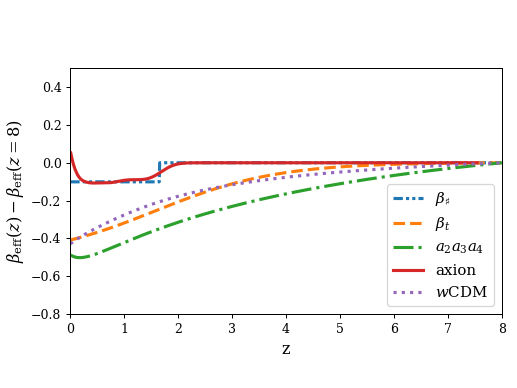

In [555]:
feature_ax.set_ylim(-0.8, 0.5)
# feature_ax.set_ylim(-1.6, 0.5)
feature_ax.set_xlim(0., 8.)
#feature_ax.set_ylim(-0.4, 0.2)

feature_ax.legend(prop={'size': 12})
feature_ax.set_aspect(3.5)
feature_fig.tight_layout()
# feature_fig.savefig('plots/fig3a_mod_of_UVX_QG.pdf')
# feature_fig.savefig('plots/fig3b_mod_of_UVX_QBG.pdf')
# feature_fig.savefig('/home/chen/GGDrive/Research/talks/plasma_talk/plots/beta_sharp.pdf')
# feature_fig.savefig('/home/chen/GGDrive/Research/talks/plasma_talk/plots/beta_smooth.pdf')
# feature_fig.savefig('/home/chen/GGDrive/Research/talks/plasma_talk/plots/quasar_snia_wcdm.pdf')
# feature_fig.savefig('/home/chen/GGDrive/Research/talks/plasma_talk/plots/quasar_snia_axion.pdf')
# feature_fig.savefig('/home/chen/GGDrive/Research/talks/plasma_talk/plots/quasar_alone_wcdm.pdf')
# feature_fig.savefig('/home/chen/GGDrive/Research/talks/plasma_talk/plots/quasar_alone_axion.pdf')
feature_fig

# Contours

In [208]:
def plot_contours(base_path, 
                base_Q, 
                base_plt_folder, 
                var1, 
                var2,
                color='b',
                sigma=1,
                alpha=0.6,
                label=None, 
                ax=None):
    
        
    transpose = False
    
    path_Q = os.path.join(base_path, base_Q, base_plt_folder, "corner_"+var1+"_"+var2+"_pth_"+str(sigma)+"sigma__"+base_Q+".dat")
    if not os.path.exists(path_Q):
        transpose = True
        path_Q = os.path.join(base_path, base_Q, base_plt_folder, "corner_"+var2+"_"+var1+"_pth_"+str(sigma)+"sigma__"+base_Q+".dat")
        # print('hit')
    
    with open(path_Q, 'rb') as f:
        figure = pickle.load(f)
        p_arr = figure.axes[2].collections[0].get_paths()        
        xlim_raw = figure.axes[2].get_xlim()
        ylim_raw = figure.axes[2].get_ylim()
        if transpose:
            xlim = ylim_raw
            ylim = xlim_raw
        else:
            xlim = xlim_raw
            ylim = ylim_raw
        plt.close(figure)

    # deal with transposed axes
    if transpose: 
        for path in p_arr:
            path.vertices = path.vertices[:,::-1]
        
    for path in p_arr:
        patch = patches.PathPatch(path, facecolor=color, alpha=alpha, lw=1)
        ax.add_patch(patch);
        
    ax.plot([1e100,2e100], [1e100,2e100], color=color, label=label)
    

    return xlim, ylim
    
   
    
    
    
def insert_plot(base_path, 
                base_Q, 
                base_plt_folder, 
                var1,
                var2,
                is_legend=False, 
                ax=None,
                label1=r"$\mathcal{Q}_{\beta_0}+\mathcal{G}$",
                label2=r"$\mathcal{Q}_{\beta_0}+\mathcal{B}+\mathcal{G}$"):
    
    # the run with quasar only
    xlim0, ylim0 = plot_contours(base_path=base_path, 
                    base_Q=base_Q, 
                    base_plt_folder=base_plt_folder, 
                    var1=var1,
                    var2=var2,
                    color='C0',
                    sigma=2,
                    alpha=0.5,
                    ax=ax)
    if is_legend:
        label = label1
    else:
        label = None    
    xlim0, ylim0 = plot_contours(base_path=base_path, 
                    base_Q=base_Q, 
                    base_plt_folder=base_plt_folder, 
                    var1=var1,
                    var2=var2,
                    color='C0',
                    sigma=1,
                    alpha=0.6,
                    ax=ax, 
                    label=label)    


    # the run with baseline
    xlim1, ylim1 = plot_contours(base_path=base_path, 
                    base_Q=base_QB, 
                    base_plt_folder=base_plt_folder, 
                    var1=var1,
                    var2=var2,
                    color='C1',
                    sigma=2,
                   alpha=0.5, 
                   ax=ax)
    if is_legend:
        label = label2
    else:
        label = None
    xlim1, ylim1 = plot_contours(base_path=base_path, 
                    base_Q=base_QB, 
                    base_plt_folder=base_plt_folder, 
                    var1=var1,
                    var2=var2,
                    color='C1',
                    sigma=1,
                   alpha=0.6, 
                   ax=ax, 
                    label=label)    

    return get_lims(xlim0, xlim1), get_lims(ylim0, ylim1)

In [209]:
def get_lims(lim1, lim2):
    new_lim = (min(lim1[0], lim2[0]), max(lim1[1], lim2[1]))
    return new_lim

<IPython.core.display.Javascript object>


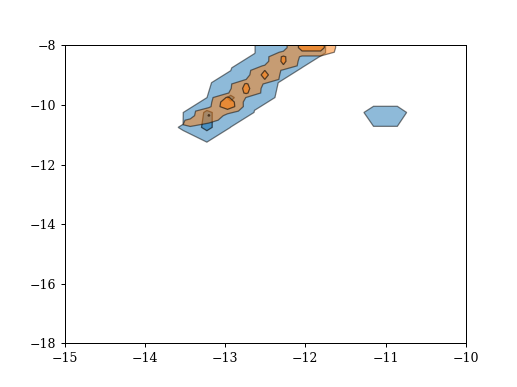

<IPython.core.display.Javascript object>


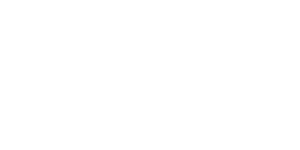

<IPython.core.display.Javascript object>


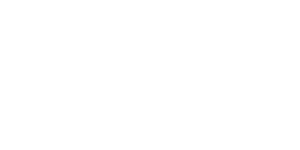

<IPython.core.display.Javascript object>


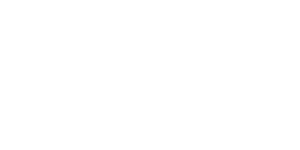

<IPython.core.display.Javascript object>


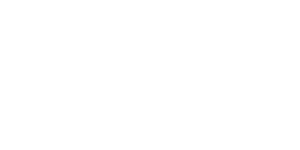

(-18.0, -8.0)

In [210]:
# axion 
base_path = "/home/chen/Downloads/quasar_code/chains/"
# base_path = "/home/chen/Downloads/quasar_code/chains/fullchains"
base_Q = "prod005_bsm_axion_quasars_bconst_h0"
base_QB = "prod011_bsm_axion_quasars_bconst_pan_bao_rs_h0"
base_plt_folder = "plots/pth_extract"
# var1 = 'h0'
# var2 = 'qso_gamma'
# var1="OmL"
# var2="logga"
var1="logma"
var2="logga"
# var1="logga"
# var2="logma"


fig, ax = plt.subplots()
insert_plot(base_path=base_path, 
            base_Q=base_Q, 
            base_plt_folder=base_plt_folder, 
            var1=var1,
            var2=var2,
            is_legend=True, 
            ax=ax)

    
    
plt.xlim(-15, -10)
plt.ylim(-18, -8)


In [211]:
axes[2]

array([<AxesSubplot:xlabel='$a_2$', ylabel='$a_4$'>,
       <AxesSubplot:xlabel='$a_3$'>, 0], dtype=object)

<IPython.core.display.Javascript object>


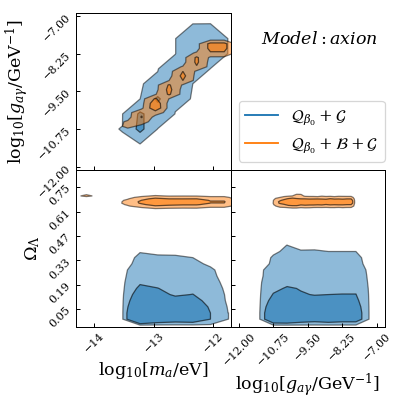

<IPython.core.display.Javascript object>


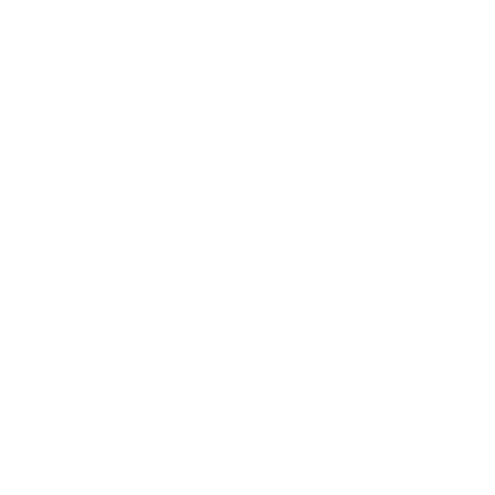

<IPython.core.display.Javascript object>


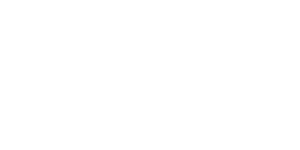

<IPython.core.display.Javascript object>


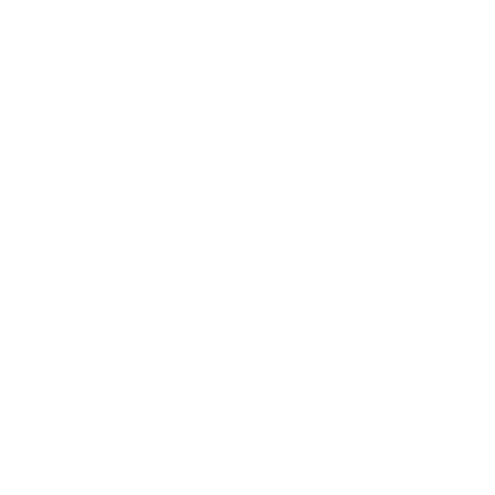

<IPython.core.display.Javascript object>


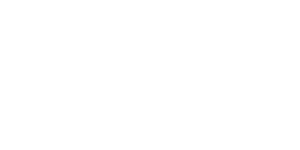

<IPython.core.display.Javascript object>


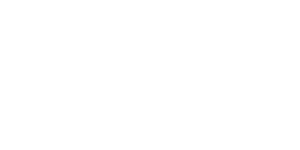

<IPython.core.display.Javascript object>


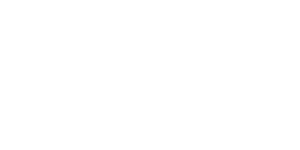

<IPython.core.display.Javascript object>


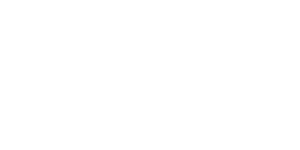

<IPython.core.display.Javascript object>


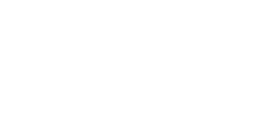

<IPython.core.display.Javascript object>


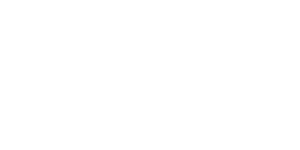

<IPython.core.display.Javascript object>


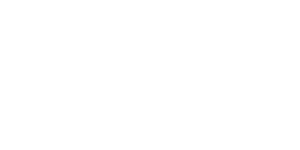

<IPython.core.display.Javascript object>


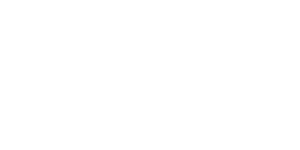

<IPython.core.display.Javascript object>


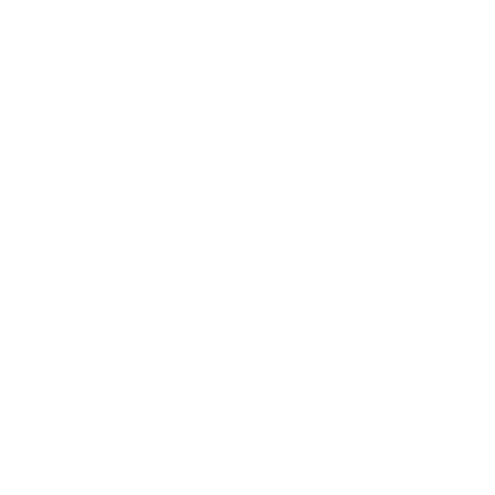

In [212]:
base_path = "/home/chen/Downloads/quasar_code/chains/"
# base_path = "/home/chen/Downloads/quasar_code/chains/fullchains"
base_Q = "prod005_bsm_axion_quasars_bconst_h0"
base_QB = "prod011_bsm_axion_quasars_bconst_pan_bao_rs_h0"
# base_QB = "prod005_1_bsm_axion_quasars_bconst_h0_domain"
# base_QB = "prod005_1_bsm_axion_quasars_bconst_h0_domain100"

# label1 = r"$\mathcal{Q}_{\beta_0}+\mathcal{G}, s=1\,\mathrm{Mpc}$"
# label2 = r"$\mathcal{Q}_{\beta_0}+\mathcal{G}, s=100\,\mathrm{Mpc}$"
label1 = r"$\mathcal{Q}_{\beta_0}+\mathcal{G}$"
label2 = r"$\mathcal{Q}_{\beta_0}+\mathcal{B}+\mathcal{G}$"

base_plt_folder = "plots/pth_extract"
slicing_direction_arr = ["logma",
                         "logga",
                         "OmL"]
label_arr = [r"$\log_{10}[m_a/\mathrm{eV}]$",
                     r"$\log_{10}[g_{a\gamma}/\mathrm{GeV^{-1}}]$",
                     r"$\Omega_\Lambda$"]

ticks_dct = {
                "logma": np.linspace(-14, -12, 3),
                "logga": np.linspace(-12, -7, 5),
                "OmL":np.linspace(0.05, 0.75, 6)
}

dim = len(slicing_direction_arr)
fig = plt.figure(figsize=(5,5), constrained_layout=False)
gs = fig.add_gridspec(dim-1, dim-1, hspace=0, wspace=0)
axes = np.zeros((dim, dim), dtype=object)
clabels = np.zeros((dim, dim), dtype=object)

todo_arr = []
for i, _ in enumerate(slicing_direction_arr):
    for j in range(i):
        todo_arr.append((i,j))

for i,j in todo_arr:
    axes[i,j] = fig.add_subplot(gs[i-1,j])
    ax = axes[i,j]
    var1 = slicing_direction_arr[j]
    var2 = slicing_direction_arr[i]
    xlim, ylim = insert_plot(base_path=base_path, 
            base_Q=base_Q, 
            base_plt_folder=base_plt_folder, 
            var1=var1,
            var2=var2,
            is_legend=True,
            ax=ax,
            label1=label1,
            label2=label2)
    

    # set labels
    ax.set_ylabel(label_arr[i], fontsize=14)
    ax.set_xlabel(label_arr[j], fontsize=14)   
    
    # set tick
    ax.set_yticks(ticks_dct[slicing_direction_arr[i]])
    ax.set_xticks(ticks_dct[slicing_direction_arr[j]])
    
    # set xlim and ylim
    ax.set_xlim((ticks_dct[var1][0]-0.3, ticks_dct[var1][-1]+0.3))
    ax.set_ylim((ticks_dct[var2][0]-0.1, ticks_dct[var2][-1]+0.1))
    
    # set x ticks style
    # if i == dim-1:
        # ax.tick_params(direction="in", pad=10)   
    # set y label style
    if j == 0:
        # ax.set_ylabel(label_arr[i], fontsize=17)
        ax.tick_params(labelleft=True, direction="in", labelsize=9, rotation=45)
        # ax.get_yaxis().set_label_coords(-0.4, 0.5)
    else:
        ax.tick_params(labelleft=False, direction="in", labelsize=9, rotation=45)
        
    
# # Hide x labels and tick labels for all but bottom plot.
for ax in axes.flat:
    try:
        ax.label_outer()
    except AttributeError:
        pass    
    
    
# plt.legend(fontsize=13)

axes[0,1] = fig.add_subplot(gs[0,1])
ax = axes[0,1]
ax.text(0.2,0.8,r"$\mathit{Model: axion}$", fontsize=14)
ax.axis('off')
ax.plot([1e100, 2e100], [1e100, 2e100], label=r"$\mathcal{Q}_{\beta_0} + \mathcal{G}$")
ax.plot([1e100, 2e100], [1e100, 2e100], label=r"$\mathcal{Q}_{\beta_0} + \mathcal{B} + \mathcal{G}$")
ax.legend(fontsize=13,loc=3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
    
    
# post-processing
# ax = axes[dim-1, 1]
# ax.tick_params(direction="in", labelsize=6, pad=10)   

plt.tight_layout()
# plt.savefig('plots/fig4c_corner-axion.pdf')

In [213]:
# load other bounds
bounds_ngc1275_arr = np.loadtxt("./likelihoods/Chandra_NGC1275.txt")
bounds_m87_arr = np.loadtxt("./likelihoods/Chandra_M87.txt")
bounds_h1821643_arr = np.loadtxt("./likelihoods/Chandra_H1821643.txt")
bounds_ssc_arr = np.loadtxt("./likelihoods/Xray-SuperStarClusters.txt")

<IPython.core.display.Javascript object>


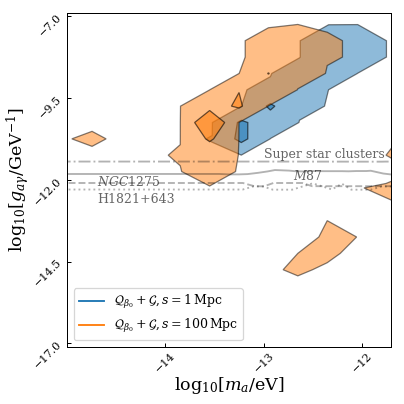

<IPython.core.display.Javascript object>


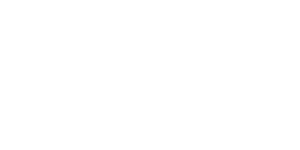

<IPython.core.display.Javascript object>


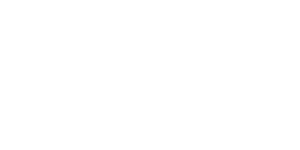

<IPython.core.display.Javascript object>


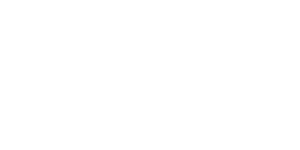

<IPython.core.display.Javascript object>


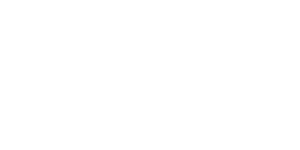

In [564]:
base_path = "/home/chen/Downloads/quasar_code/chains/"
# base_path = "/home/chen/Downloads/quasar_code/chains/fullchains"
base_Q = "prod005_bsm_axion_quasars_bconst_h0"
# base_QB = "prod005_bsm_axion_quasars_bconst_h0"
# base_QB = "prod005_1_bsm_axion_quasars_bconst_h0_domain"
base_QB = "prod005_1_bsm_axion_quasars_bconst_h0_domain100"

label1 = r"$\mathcal{Q}_{\beta_0}+\mathcal{G}, s=1\,\mathrm{Mpc}$"
label2 = r"$\mathcal{Q}_{\beta_0}+\mathcal{G}, s=100\,\mathrm{Mpc}$"
# label1 = r"$\mathcal{Q}_{\beta_0}+\mathcal{G}$"
# label2 = r"$\mathcal{Q}_{\beta_0}+\mathcal{B}+\mathcal{G}$"

base_plt_folder = "plots/pth_extract"
slicing_direction_arr = ["logma",
                         "logga"]
label_arr = [r"$\log_{10}[m_a/\mathrm{eV}]$", 
             r"$\log_{10}[g_{a\gamma}/\mathrm{GeV^{-1}}]$"]

ticks_dct = {
                "logma": np.linspace(-14, -12, 3),
                "logga": np.linspace(-17, -7, 5)
}

dim = len(slicing_direction_arr)
fig = plt.figure(figsize=(5,5), constrained_layout=False)
gs = fig.add_gridspec(dim-1, dim-1, hspace=0, wspace=0)
axes = np.zeros((dim, dim), dtype=object)
clabels = np.zeros((dim, dim), dtype=object)

todo_arr = []
for i, _ in enumerate(slicing_direction_arr):
    for j in range(i):
        todo_arr.append((i,j))

is_legend = True
for i,j in todo_arr:
    axes[i,j] = fig.add_subplot(gs[i-1,j])
    ax = axes[i,j]
    var1 = slicing_direction_arr[j]
    var2 = slicing_direction_arr[i]
    xlim, ylim = insert_plot(base_path=base_path, 
            base_Q=base_Q, 
            base_plt_folder=base_plt_folder, 
            var1=var1,
            var2=var2,
            is_legend=is_legend,
            ax=ax,
            label1=label1,
            label2=label2)
    is_legend = False
    

    # set labels
    ax.set_ylabel(label_arr[i], fontsize=14, labelpad=0)
    ax.set_xlabel(label_arr[j], fontsize=14, labelpad=0)   
    
    # set tick
    ax.set_yticks(ticks_dct[slicing_direction_arr[i]])
    ax.set_xticks(ticks_dct[slicing_direction_arr[j]])
    
    # set xlim and ylim
    ax.set_xlim((ticks_dct[var1][0]-1., ticks_dct[var1][-1]+0.3))
    ax.set_ylim((ticks_dct[var2][0]-0.1, ticks_dct[var2][-1]+0.1))
    
    # set x ticks style
    # if i == dim-1:
        # ax.tick_params(direction="in", pad=10)   
    # set y label style
    if j == 0:
        # ax.set_ylabel(label_arr[i], fontsize=17)
        ax.tick_params(labelleft=True, direction="in", labelsize=9, rotation=45)
        # ax.get_yaxis().set_label_coords(-0.4, 0.5)
    else:
        ax.tick_params(labelleft=False, direction="in", labelsize=9, rotation=45)
        
    
# # Hide x labels and tick labels for all but bottom plot.
for ax in axes.flat:
    try:
        ax.label_outer()
    except AttributeError:
        pass    
    
    
# post-processing
# ax = axes[dim-1, 1]
# ax.tick_params(direction="in", labelsize=6, pad=10)   
# fig.axes[0].yaxis.labelpad = 3
plt.legend()
plt.tight_layout()



# add other bounds
ax = fig.axes[0]
ax.plot(np.log10(bounds_ngc1275_arr[:,0]), np.log10(bounds_ngc1275_arr[:,1]), 'k--', alpha=0.3)
ax.text(-14.7, -12.2, r"$\mathit{NGC1275}$", alpha=0.6)
ax.plot(np.log10(bounds_m87_arr[:,0]), np.log10(bounds_m87_arr[:,1]), 'k-', alpha=0.3)
ax.text(-12.7, -12, r"$\mathit{M87}$", alpha=0.6)
ax.plot(np.log10(bounds_h1821643_arr[:,0]), np.log10(bounds_h1821643_arr[:,1]), 'k:', alpha=0.3)
ax.text(-14.7, -12.7, r"H1821+643", alpha=0.6)
ax.plot(np.log10(bounds_ssc_arr[:,0]), np.log10(bounds_ssc_arr[:,1]), 'k-.', alpha=0.3)
ax.text(-13, -11.33, r"Super star clusters", alpha=0.6)

# plt.savefig('plots/fig1_axion-bounds.pdf')
# plt.savefig('/home/chen/GGDrive/Research/talks/plasma_talk/plots/quasar_axion_fits_QG.pdf')
# plt.savefig('/home/chen/GGDrive/Research/talks/plasma_talk/plots/quasar_axion_fits_QG_large_domain.pdf')

<IPython.core.display.Javascript object>


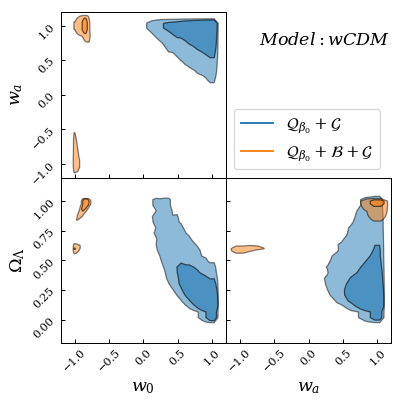

<IPython.core.display.Javascript object>


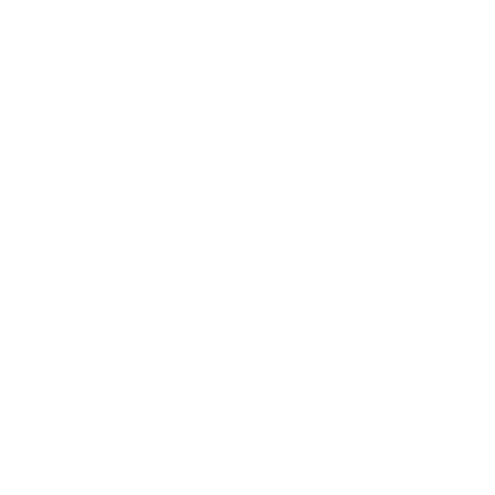

<IPython.core.display.Javascript object>


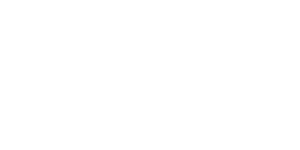

<IPython.core.display.Javascript object>


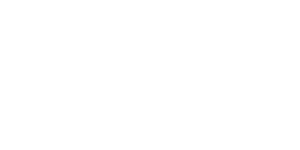

<IPython.core.display.Javascript object>


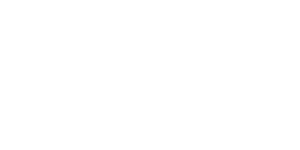

<IPython.core.display.Javascript object>


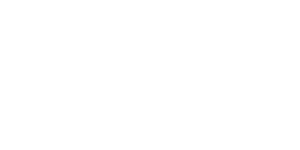

<IPython.core.display.Javascript object>


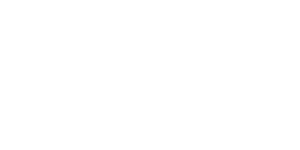

<IPython.core.display.Javascript object>


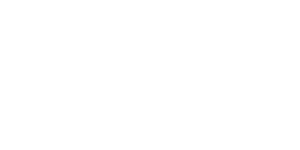

<IPython.core.display.Javascript object>


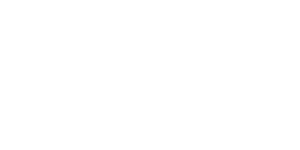

<IPython.core.display.Javascript object>


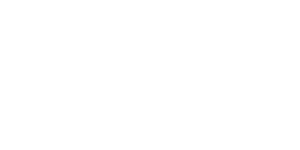

<IPython.core.display.Javascript object>


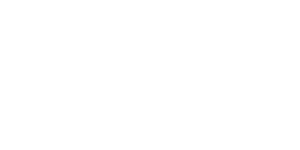

<IPython.core.display.Javascript object>


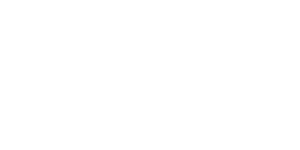

<IPython.core.display.Javascript object>


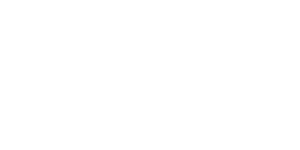

In [215]:
# wCDM

base_path = "/home/chen/Downloads/quasar_code/chains/"
# base_path = "/home/chen/Downloads/quasar_code/chains/fullchains"
base_Q = "prod012_bsm_wcdm_quasars_bconst_h0"
base_QB = "prod009_bsm_wcdm_quasars_bconst_pan_bao_rs_h0"
base_plt_folder = "plots/pth_extract"
slicing_direction_arr = ["w0",
                       "wa",
                       "OmL"]
label_arr = [r"$w_0$", 
                     r"$w_a$",
                     r"$\Omega_\Lambda$"]

ticks_dct = {
                "w0": np.linspace(-1, 1, 5),
                "wa": np.linspace(-1, 1, 5),
                "OmL":np.linspace(0, 1, 5)
}

dim = len(slicing_direction_arr)
fig = plt.figure(figsize=(5,5), constrained_layout=False)
gs = fig.add_gridspec(dim-1, dim-1, hspace=0, wspace=0)
axes = np.zeros((dim, dim), dtype=object)
clabels = np.zeros((dim, dim), dtype=object)

todo_arr = []
for i, _ in enumerate(slicing_direction_arr):
    for j in range(i):
        todo_arr.append((i,j))

for i,j in todo_arr:
    axes[i,j] = fig.add_subplot(gs[i-1,j])
    ax = axes[i,j]
    var1 = slicing_direction_arr[j]
    var2 = slicing_direction_arr[i]
    xlim, ylim = insert_plot(base_path=base_path, 
            base_Q=base_Q, 
            base_plt_folder=base_plt_folder, 
            var1=var1,
            var2=var2,
            is_legend=True,
            ax=ax)
    

    # set labels
    ax.set_ylabel(label_arr[i], fontsize=14)
    ax.set_xlabel(label_arr[j], fontsize=14)   
    
    # set tick
    ax.set_yticks(ticks_dct[slicing_direction_arr[i]])
    ax.set_xticks(ticks_dct[slicing_direction_arr[j]])
    
    # set xlim and ylim
    ax.set_xlim((ticks_dct[var1][0]-0.2, ticks_dct[var1][-1]+0.2))
    ax.set_ylim((ticks_dct[var2][0]-0.2, ticks_dct[var2][-1]+0.2))
    
    # set x ticks style
    # if i == dim-1:
        # ax.tick_params(direction="in", pad=10)   
    # set y label style
    if j == 0:
        # ax.set_ylabel(label_arr[i], fontsize=17)
        ax.tick_params(labelleft=True, direction="in", labelsize=9, rotation=45)
        # ax.get_yaxis().set_label_coords(-0.4, 0.5)
    else:
        ax.tick_params(labelleft=False, direction="in", labelsize=9, rotation=45)
        
    
# # Hide x labels and tick labels for all but bottom plot.
for ax in axes.flat:
    try:
        ax.label_outer()
    except AttributeError:
        pass    
    

# plt.legend()
# axes[1,1] = fig.add_subplot(gs[1,1])
# ax = axes[1,1]
# ax.text(0.4,1.5,r"$\mathit{wCDM}$", fontsize=14)
# ax.axis('off')

axes[0,1] = fig.add_subplot(gs[0,1])
ax = axes[0,1]
ax.text(0.2,0.8,r"$\mathit{Model: wCDM}$", fontsize=14)
ax.axis('off')
ax.plot([1e100, 2e100], [1e100, 2e100], label=r"$\mathcal{Q}_{\beta_0} + \mathcal{G}$")
ax.plot([1e100, 2e100], [1e100, 2e100], label=r"$\mathcal{Q}_{\beta_0} + \mathcal{B} + \mathcal{G}$")
ax.legend(fontsize=13,loc=3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
    
# post-processing
# ax = axes[dim-1, 1]
# ax.tick_params(direction="in", labelsize=6, pad=10)   
# plt.legend()
plt.tight_layout()
plt.savefig('plots/fig4b_corner-wcdm.pdf')

In [216]:
gs

GridSpec(2, 2)

<IPython.core.display.Javascript object>


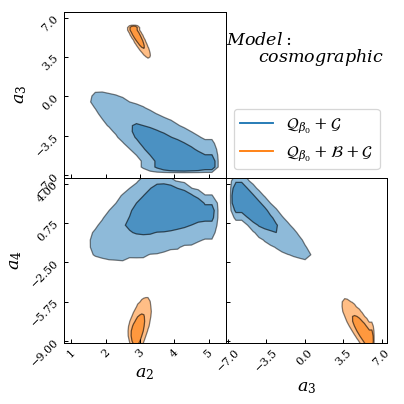

<IPython.core.display.Javascript object>


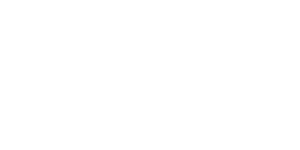

<IPython.core.display.Javascript object>


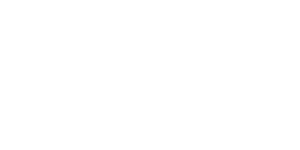

<IPython.core.display.Javascript object>


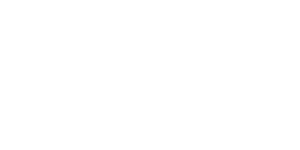

<IPython.core.display.Javascript object>


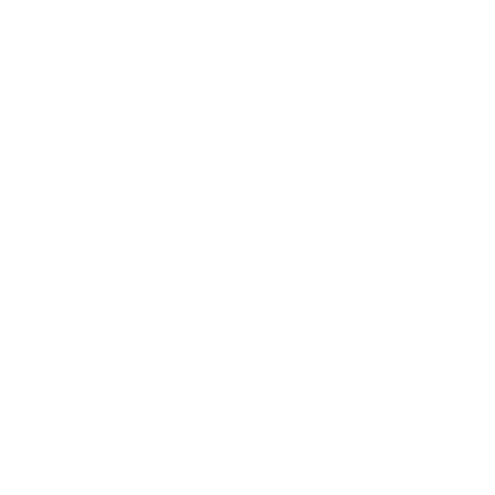

<IPython.core.display.Javascript object>


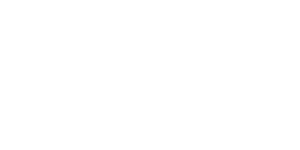

<IPython.core.display.Javascript object>


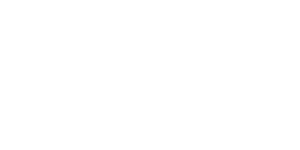

<IPython.core.display.Javascript object>


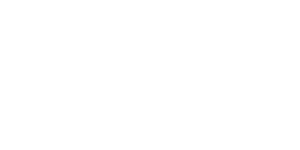

<IPython.core.display.Javascript object>


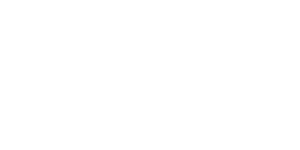

<IPython.core.display.Javascript object>


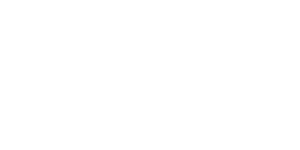

<IPython.core.display.Javascript object>


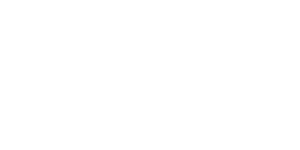

<IPython.core.display.Javascript object>


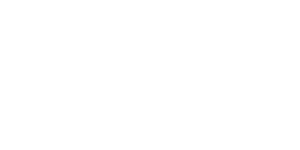

<IPython.core.display.Javascript object>


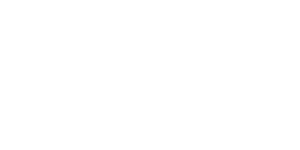

In [222]:
# a2a3

base_path = "/home/chen/Downloads/quasar_code/chains/"
# base_path = "/home/chen/Downloads/quasar_code/chains/fullchains"
base_Q = "prod013_bsm_a2a3_quasars_bconst_h0"
base_QB = "prod010_bsm_a2a3_quasars_bconst_pan_bao_rs_h0"
base_plt_folder = "plots/pth_extract"
slicing_direction_arr = ["a2",
                         "a3",
                         "a4"]
label_arr = [r"$a_2$", 
             r"$a_3$",
             r"$a_4$"]

ticks_dct = {
                "a2": np.linspace(1., 5, 5),
                "a3": np.linspace(-7, 7, 5),
                "a4":np.linspace(-9, 4, 5)
}

dim = len(slicing_direction_arr)
fig = plt.figure(figsize=(5,5), constrained_layout=False)
gs = fig.add_gridspec(dim-1, dim-1, hspace=0, wspace=0)
axes = np.zeros((dim, dim), dtype=object)
clabels = np.zeros((dim, dim), dtype=object)

todo_arr = []
for i, _ in enumerate(slicing_direction_arr):
    for j in range(i):
        todo_arr.append((i,j))

for i,j in todo_arr:
    axes[i,j] = fig.add_subplot(gs[i-1,j])
    ax = axes[i,j]
    var1 = slicing_direction_arr[j]
    var2 = slicing_direction_arr[i]
    xlim, ylim = insert_plot(base_path=base_path, 
            base_Q=base_Q, 
            base_plt_folder=base_plt_folder, 
            var1=var1,
            var2=var2,
            is_legend=True,
            ax=ax)
    

    # set labels
    ax.set_ylabel(label_arr[i], fontsize=14)
    ax.set_xlabel(label_arr[j], fontsize=14)   
    
    # set tick
    ax.set_yticks(ticks_dct[slicing_direction_arr[i]])
    ax.set_xticks(ticks_dct[slicing_direction_arr[j]])
    
    # set xlim and ylim
    ax.set_xlim((ticks_dct[var1][0]-0.2, ticks_dct[var1][-1]+0.5))
    ax.set_ylim((ticks_dct[var2][0]-0.2, ticks_dct[var2][-1]+0.5))
    
    # set x ticks style
    # if i == dim-1:
        # ax.tick_params(direction="in", pad=10)   
    # set y label style
    if j == 0:
        # ax.set_ylabel(label_arr[i], fontsize=17)
        ax.tick_params(labelleft=True, direction="in", labelsize=9, rotation=45)
        # ax.get_yaxis().set_label_coords(-0.4, 0.5)
    else:
        ax.tick_params(labelleft=False, direction="in", labelsize=9, rotation=45)
        
    
# # Hide x labels and tick labels for all but bottom plot.
for ax in axes.flat:
    try:
        ax.label_outer()
    except AttributeError:
        pass    


axes[0,1] = fig.add_subplot(gs[0,1])
ax = axes[0,1]
ax.text(0.,0.8,r"$\mathit{Model:}$", fontsize=14)
ax.text(0.2,0.7,r"$\mathit{cosmographic}$", fontsize=14)
ax.axis('off')
ax.plot([1e100, 2e100], [1e100, 2e100], label=r"$\mathcal{Q}_{\beta_0} + \mathcal{G}$")
ax.plot([1e100, 2e100], [1e100, 2e100], label=r"$\mathcal{Q}_{\beta_0} + \mathcal{B} + \mathcal{G}$")
ax.legend(fontsize=13,loc=3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

    
# post-processing
# ax = axes[dim-1, 1]
# ax.tick_params(direction="in", labelsize=6, pad=10)   

plt.tight_layout()
# plt.savefig('plots/fig4a_corner-a2a3.pdf')

# Back up notes

In [219]:
# # finding bestfit point 
# # run on the cluster
# (bf_chi2,
#  x_mesh,
#  y_mesh,
#  chi2_mins,
#  idx_mins_global,
#  x_arr, y_arr,
#  delta_arr,
#  _,
#  pts, 
#  blobs) = parse(directory="../quasars_master/chains/run055_axion_planckrs_qso_pan_bao_zoomedin",    #"./chains/run027_loglkl_amp_fix_bigrange",
#                     chain_name="chain_1.h5",
#                     x_name="OmL",
#                     y_name="h0",
#                     bins=10)

In [220]:
# pts[index from above]